# Prototype: omikron

| Properties      | Data    |
|---------------|-----------|
| *Dateset* | `CICIDS2017` |
| *Labels* | `ALL` |
| *Normalization* | `Min-Max` |
| *Sample Size* | `100.000`|
| *Adversarial Attack* | `FGSM & C&W & JSMA & PGD & Boundary & HSJ` |
| *Explanations* | `SHAP` |
| *Detector* | `Detect Attacks and Misclassified Samples` |


---

## *Setup*

In [3]:
# To import modules from the functions directory
import sys
import os
# Get current directory of script or notebook
current_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()

# Append parent directory (where "functions/" likely lives)
parent_dir = os.path.abspath(os.path.join(current_dir, ".."))
if parent_dir not in sys.path:
    sys.path.insert(0, parent_dir)  # Make sure it's at the front

## Data Preprocessing

In [4]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

encoding_type = 0 # binary encoding
norm_type = 0 # min-max normalization
sample_size = 50000 # sample size for each label -> 2 x sample_size = total samples

dataset = dp.build_dataset()

normalizer, zero_columns = dp.generate_normalizer(dataset, norm_type)

feature_df, label_df, used_indices = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, sample_size=sample_size, random_sample_state=3001)
print(f"Generate Features | Indices: {feature_df.index[:5]}... | Shape: {feature_df.shape}")
print(f"Generate Labels | Indices: {label_df.index[:5]}... | Shape: {label_df.shape}")
print(label_df.value_counts()) # -> will first show [0, 1] then [1, 0] if label number is equal

-- Building CICIDS2017 dataset --
--- Combining all CICIDS2017 files ---
Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Tuesday-WorkingHours.pcap_ISCX.csv
Wednesday-workingHours.pcap_ISCX.csv
Friday-WorkingHours-Morning.pcap_ISCX.csv
Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Monday-WorkingHours.pcap_ISCX.csv
Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv
--- Removing NaN and Infinity values ---
Removing 1358 Rows with NaN values
Removing 1509 Rows with Infinity values
-- Generating normalizer --
--- Splitting labels and features ---
Zero Columns: [' Bwd PSH Flags', ' Bwd URG Flags', 'Fwd Avg Bytes/Bulk', ' Fwd Avg Packets/Bulk', ' Fwd Avg Bulk Rate', ' Bwd Avg Bytes/Bulk', ' Bwd Avg Packets/Bulk', 'Bwd Avg Bulk Rate']
-- Preprocessing data --
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Sampling balanced data ---
Sample to shape: (100000, 70)
--- Normalizing fe

## Split Data

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.1, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(90000, 70) (10000, 70) (90000, 2) (10000, 2)


## Create IDS

In [6]:
import functions.intrusion_detection_system as ids
import importlib
importlib.reload(ids)

# TODO: build ids with complete dataset
# X_train_all, y_train_all, _ = dp.preprocess_data(dataset, encoding_type, normalizer, zero_columns, random_sample_state=42)
# print(y_train_all.value_counts())
# X_train_all, X_test_all, y_train_all, y_test_all = train_test_split(X_train_all, y_train_all, test_size=0.2, random_state=42)
# print(X_train_all.shape, X_test_all.shape, y_train_all.shape, y_test_all.shape)

# build ids and evaluate it on test data
ids_model = ids.build_intrusion_detection_system(X_train, y_train, X_test, y_test)
# store prediction from X_train
y_pred = ids.predict(ids_model, X_train, columns=y_train.columns)
print(f"Predictions on Normal Data | Indices: {y_pred.index[:5]}... | Shape: {y_pred.shape}")

2025-04-28 15:17:40.444393: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745846260.456336   53943 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745846260.459813   53943 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-04-28 15:17:40.472057: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/20


2025-04-28 15:17:41.845284: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 885us/step - accuracy: 0.8968 - loss: 0.2664 - val_accuracy: 0.9489 - val_loss: 0.1258
Epoch 2/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1s 812us/step - accuracy: 0.9498 - loss: 0.1215 - val_accuracy: 0.9546 - val_loss: 0.1093
Epoch 3/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1s 823us/step - accuracy: 0.9560 - loss: 0.1079 - val_accuracy: 0.9611 - val_loss: 0.0982
Epoch 4/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1s 813us/step - accuracy: 0.9608 - loss: 0.0990 - val_accuracy: 0.9662 - val_loss: 0.0912
Epoch 5/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 831us/step - accuracy: 0.9645 - loss: 0.0919 - val_accuracy: 0.9684 - val_loss: 0.0855
Epoch 6/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1s 808us/step - accuracy: 0.9681 - loss: 0.0859 - val_accuracy: 0.9706 - val_loss: 0.0792
Epoch 7/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 1s 815us/step - accuracy: 0.9703 - loss: 0.0808 - val_accuracy: 0.9734 - val_loss: 0.0752
Epoch 8/20
1800/1800 ━━━━━━━━━━━━━━━━━━━━ 2s 826us/step - accuracy: 0.9729 - loss: 0.07

2025-04-28 15:18:12.487534: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


Global Accuracy: 98.40%
              precision    recall  f1-score   support

      ATTACK     0.9743    0.9947    0.9844      5061
      BENIGN     0.9944    0.9731    0.9836      4939

    accuracy                         0.9840     10000
   macro avg     0.9843    0.9839    0.9840     10000
weighted avg     0.9842    0.9840    0.9840     10000

2813/2813 ━━━━━━━━━━━━━━━━━━━━ 1s 374us/step
Predictions on Normal Data | Indices: Index([2306655, 1376979, 173584, 2612982, 2697027], dtype='int64')... | Shape: (90000, 2)


## Generate Adversarial Attacks

In [6]:
import functions.attack_generator as ag
import importlib
import numpy as np
importlib.reload(ag)

all_features = dataset.drop(columns=[' Label'])
art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

# Split the training data into classes
class_labels = ["normal", "cw", "fgsm", "jsma", "pgd", "boundary", "hsj"]
splits = ag.split_into_attack_classes(X_train, y_train, class_labels)
X_normal, y_normal = splits["normal"]
X_cw, y_cw = splits["cw"]
X_fgsm, y_fgsm = splits["fgsm"]
X_jsma, y_jsma = splits["jsma"]
X_pgd, y_pgd = splits["pgd"]
X_boundary, y_boundary = splits["boundary"]
X_hsj, y_hsj = splits["hsj"]
print(f"Normal Data: {X_normal.shape} | CW Data: {X_cw.shape} | FGSM Data: {X_fgsm.shape} | JSMA Data: {X_jsma.shape} | PGD Data: {X_pgd.shape} | Boundary Data: {X_boundary.shape} | HSJ Data: {X_hsj.shape}")

# -- White-Box Attacks --
# generate attacks on the separated training data
X_adv_fgsm = ag.generate_fgsm_attacks(art_model, X_fgsm, target_label=1)
print(f"Create FGSM Adversarial Attack | Indices: {X_adv_fgsm.index[:5]}... | Shape: {X_adv_fgsm.shape}")
y_pred_adv_fgsm = ag.evaluate_art_model(art_model, X_adv_fgsm, y_fgsm)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_fgsm.index[:5]}... | Shape: {y_pred_adv_fgsm.shape}")
y_pred_fgsm = y_pred.loc[X_fgsm.index]

import multiprocessing
num_cores = multiprocessing.cpu_count()
X_adv_cw = ag.generate_cw_attacks_parallel(art_model, X_cw, target_label=1, num_cores=num_cores)
print(f"Create CW Adversarial Attack | Indices: {X_adv_cw.index[:5]}... | Shape: {X_adv_cw.shape}")
y_pred_adv_cw = ag.evaluate_art_model(art_model, X_adv_cw, y_cw)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_cw.index[:5]}... | Shape: {y_pred_adv_cw.shape}")
y_pred_cw = y_pred.loc[X_cw.index]

X_adv_jsma = ag.generate_jsma_attacks(art_model, X_jsma, target_label=1)
print(f"Create JSMA Adversarial Attack | Indices: {X_adv_jsma.index[:5]}... | Shape: {X_adv_jsma.shape}")
y_pred_adv_jsma = ag.evaluate_art_model(art_model, X_adv_jsma, y_jsma)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_jsma.index[:5]}... | Shape: {y_pred_adv_jsma.shape}")
y_pred_jsma = y_pred.loc[X_jsma.index]

X_adv_pgd = ag.generate_pgd_attacks(art_model, X_pgd, target_label=1)
print(f"Create PGD Adversarial Attack | Indices: {X_adv_pgd.index[:5]}... | Shape: {X_adv_pgd.shape}")
y_pred_adv_pgd = ag.evaluate_art_model(art_model, X_adv_pgd, y_pgd)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_pgd.index[:5]}... | Shape: {y_pred_adv_pgd.shape}")
y_pred_pgd = y_pred.loc[X_pgd.index]

# -- Black-Box Attacks --
import pandas as pd
X_hsj_first = X_hsj[:8000] # split data to avoid memory error
X_hsj_second = X_hsj[8000:16000]
X_adv_hsj_first = ag.generate_hsj_attacks_parallel(art_model, X_hsj_first, target_label=1, num_cores=num_cores-1) # TODO: use num_cores-1 to avoid memory error
X_adv_hsj_second = ag.generate_hsj_attacks_parallel(art_model, X_hsj_second, target_label=1, num_cores=num_cores-1) # TODO: use num_cores-1 to avoid memory error
X_adv_hsj = pd.concat([X_adv_hsj_first, X_adv_hsj_second])
# X_adv_hsj = ag.generate_hsj_attacks_parallel(art_model, X_hsj, target_label=1, num_cores=num_cores)
print(f"Create HSJ Adversarial Attack | Indices: {X_adv_hsj.index[:5]}... | Shape: {X_adv_hsj.shape}")
y_pred_adv_hsj = ag.evaluate_art_model(art_model, X_adv_hsj, y_hsj)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_hsj.index[:5]}... | Shape: {y_pred_adv_hsj.shape}")
y_pred_hsj = y_pred.loc[X_hsj.index]

X_boundary_first = X_boundary[:8000] # split data to avoid memory error
X_boundary_second = X_boundary[8000:16000]
X_adv_boundary_first = ag.generate_boundary_attacks_parallel(art_model, X_boundary_first, target_label=1, num_cores=num_cores)
X_adv_boundary_second = ag.generate_boundary_attacks_parallel(art_model, X_boundary_second, target_label=1, num_cores=num_cores)
X_adv_boundary = pd.concat([X_adv_boundary_first, X_adv_boundary_second])
print(f"Create Boundary Adversarial Attack | Indices: {X_adv_boundary.index[:5]}... | Shape: {X_adv_boundary.shape}")
y_pred_adv_boundary = ag.evaluate_art_model(art_model, X_adv_boundary, y_boundary)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_boundary.index[:5]}... | Shape: {y_pred_adv_boundary.shape}")
y_pred_boundary = y_pred.loc[X_adv_boundary.index]

Normal Data: (12858, 70) | CW Data: (12857, 70) | FGSM Data: (12857, 70) | JSMA Data: (12857, 70) | PGD Data: (12857, 70) | Boundary Data: (12857, 70) | HSJ Data: (12857, 70)
Adversarial FGSM examples generated. Shape: (12857, 70)
Create FGSM Adversarial Attack | Indices: Index([1556755, 1502880, 1188693, 1901844, 1433020], dtype='int64')... | Shape: (12857, 70)
Accuracy: 49.64%
              precision    recall  f1-score   support

      ATTACK     0.0000    0.0000    0.0000      6475
      BENIGN     0.4964    1.0000    0.6634      6382

    accuracy                         0.4964     12857
   macro avg     0.2482    0.5000    0.3317     12857
weighted avg     0.2464    0.4964    0.3293     12857

Confusion Matrix: Positive == BENIGN
TN: 0, FP: 6475, FN: 0, TP: 6382
Predictions on Adversarial Attacks | Indices: Index([1556755, 1502880, 1188693, 1901844, 1433020], dtype='int64')... | Shape: (12857, 2)
Running attack using 24 CPU cores...

Process 1285225 is generating adversarial exam

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/535 [00:00<?, ?it/s]

C&W L_2:   0%|          | 0/552 [00:00<?, ?it/s]

Create CW Adversarial Attack | Indices: Index([1761902, 107683, 1209133, 511075, 937845], dtype='int64')... | Shape: (12857, 70)
Accuracy: 75.44%
              precision    recall  f1-score   support

      ATTACK     0.9979    0.5127    0.6774      6466
      BENIGN     0.6695    0.9989    0.8017      6391

    accuracy                         0.7544     12857
   macro avg     0.8337    0.7558    0.7395     12857
weighted avg     0.8347    0.7544    0.7392     12857

Confusion Matrix: Positive == BENIGN
TN: 3315, FP: 3151, FN: 7, TP: 6384
Predictions on Adversarial Attacks | Indices: Index([1761902, 107683, 1209133, 511075, 937845], dtype='int64')... | Shape: (12857, 2)


JSMA:   0%|          | 0/12857 [00:00<?, ?it/s]

Adversarial JSMA examples generated. Shape: (12857, 70)
Create JSMA Adversarial Attack | Indices: Index([979925, 1338813, 1870573, 367268, 890837], dtype='int64')... | Shape: (12857, 70)
Accuracy: 49.72%
              precision    recall  f1-score   support

      ATTACK     0.0000    0.0000    0.0000      6465
      BENIGN     0.4972    1.0000    0.6641      6392

    accuracy                         0.4972     12857
   macro avg     0.2486    0.5000    0.3321     12857
weighted avg     0.2472    0.4972    0.3302     12857

Confusion Matrix: Positive == BENIGN
TN: 0, FP: 6465, FN: 0, TP: 6392
Predictions on Adversarial Attacks | Indices: Index([979925, 1338813, 1870573, 367268, 890837], dtype='int64')... | Shape: (12857, 2)


PGD - Batches: 0it [00:00, ?it/s]

2025-04-22 17:09:46.662988: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Adversarial PGD examples generated. Shape: (12857, 70)
Create PGD Adversarial Attack | Indices: Index([335288, 163852, 379946, 169074, 324288], dtype='int64')... | Shape: (12857, 70)
Accuracy: 49.94%
              precision    recall  f1-score   support

      ATTACK     0.0000    0.0000    0.0000      6436
      BENIGN     0.4994    1.0000    0.6661      6421

    accuracy                         0.4994     12857
   macro avg     0.2497    0.5000    0.3331     12857
weighted avg     0.2494    0.4994    0.3327     12857

Confusion Matrix: Positive == BENIGN
TN: 0, FP: 6436, FN: 0, TP: 6421
Predictions on Adversarial Attacks | Indices: Index([335288, 163852, 379946, 169074, 324288], dtype='int64')... | Shape: (12857, 2)
Running attack using 23 CPU cores...

Process 1342556 is generating adversarial examples for batch of size 347 
Process 1342557 is generating adversarial examples for batch of size 347 
Process 1342558 is generating adversarial examples for batch of size 347 
Process 134

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/347 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/366 [00:00<?, ?it/s]

Adversarial HopSkipJump examples generated. Shape: (8000, 70)
Running attack using 23 CPU cores...

Process 1364151 is generating adversarial examples for batch of size 211 
Process 1364152 is generating adversarial examples for batch of size 211 
Process 1364153 is generating adversarial examples for batch of size 211 
Process 1364154 is generating adversarial examples for batch of size 211 
Process 1364155 is generating adversarial examples for batch of size 211 
Process 1364156 is generating adversarial examples for batch of size 211 
Process 1364157 is generating adversarial examples for batch of size 211 




Process 1364159 is generating adversarial examples for batch of size 211 
Process 1364158 is generating adversarial examples for batch of size 211 

Process 1364160 is generating adversarial examples for batch of size 211 


Process 1364161 is generating adversarial examples for batch of size 211 
Process 1364162 is generating adversarial examples for batch of size 211 
Proce

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/211 [00:00<?, ?it/s]

HopSkipJump:   0%|          | 0/215 [00:00<?, ?it/s]

Adversarial HopSkipJump examples generated. Shape: (4857, 70)
Create HSJ Adversarial Attack | Indices: Index([88742, 2133571, 243066, 370119, 1901648], dtype='int64')... | Shape: (12857, 70)
Accuracy: 49.59%
              precision    recall  f1-score   support

      ATTACK     0.0000    0.0000    0.0000      6481
      BENIGN     0.4959    1.0000    0.6630      6376

    accuracy                         0.4959     12857
   macro avg     0.2480    0.5000    0.3315     12857
weighted avg     0.2459    0.4959    0.3288     12857

Confusion Matrix: Positive == BENIGN
TN: 0, FP: 6481, FN: 0, TP: 6376
Predictions on Adversarial Attacks | Indices: Index([88742, 2133571, 243066, 370119, 1901648], dtype='int64')... | Shape: (12857, 2)
Running attack using 24 CPU cores...

Process 1378853 is generating adversarial examples for batch of size 333 
Process 1378854 is generating adversarial examples for batch of size 333 
Process 1378855 is generating adversarial examples for batch of size 333 
Pr

In [7]:
print(f"Adversarial Samples Generated | FGSM: {X_adv_fgsm.shape} | CW: {X_adv_cw.shape} | JSMA: {X_adv_jsma.shape} | PGD: {X_adv_pgd.shape} | HSJ: {X_hsj.shape} | Boundary: {X_boundary.shape}")

Adversarial Samples Generated | FGSM: (12857, 70) | CW: (12857, 70) | JSMA: (12857, 70) | PGD: (12857, 70) | HSJ: (12857, 70) | Boundary: (12857, 70)


In [8]:
def get_correctly_benign_classified_indices(y_train, y_pred):
    benign_indices = y_train[y_train['BENIGN'] == 1].index
    benign_adv_predicted_indices = y_pred[y_pred['BENIGN'] == 1].index
    correctly_benign_classified_indices = benign_indices.intersection(benign_adv_predicted_indices)
    return correctly_benign_classified_indices

def get_misclassified_as_benign_due_attack_indices(y_train, y_pred, y_pred_adv):
    attack_indices = y_train[y_train['ATTACK'] == 1].index
    attack_adv_predicted_indices = y_pred[y_pred['ATTACK'] == 1].index
    benign_predicted_adversarial_indices = y_pred_adv[y_pred_adv['BENIGN'] == 1].index
    misclassified_as_benign_due_attack_indices = attack_indices.intersection(attack_adv_predicted_indices).intersection(benign_predicted_adversarial_indices)
    return misclassified_as_benign_due_attack_indices

In [10]:
y_pred_normal = y_pred.loc[X_normal.index]
correctly_benign_classified_indices = get_correctly_benign_classified_indices(y_normal, y_pred_normal)
misclassified_as_benign_indices = get_misclassified_as_benign_due_attack_indices(y_normal, y_normal, y_pred_normal)

correctly_benign_classified_indices_fgsm = get_correctly_benign_classified_indices(y_fgsm, y_pred_adv_fgsm)
misclassified_as_benign_due_attack_indices_fgsm = get_misclassified_as_benign_due_attack_indices(y_fgsm, y_pred_fgsm, y_pred_adv_fgsm)

correctly_benign_classified_indices_cw = get_correctly_benign_classified_indices(y_cw, y_pred_cw)
misclassified_as_benign_due_attack_indices_cw = get_misclassified_as_benign_due_attack_indices(y_cw, y_pred_cw, y_pred_adv_cw)

correctly_benign_classified_indices_jsma = get_correctly_benign_classified_indices(y_jsma, y_pred_jsma)
misclassified_as_benign_due_attack_indices_jsma = get_misclassified_as_benign_due_attack_indices(y_jsma, y_pred_jsma, y_pred_adv_jsma)

# TODO: is it correct to only include the samples that are correctly classified from the IDS?
correctly_benign_classified_indices_pgd = get_correctly_benign_classified_indices(y_pgd, y_pred_pgd)
misclassified_as_benign_due_attack_indices_pgd = get_misclassified_as_benign_due_attack_indices(y_pgd, y_pred_pgd, y_pred_adv_pgd)

correctly_benign_classified_indices_boundary = get_correctly_benign_classified_indices(y_boundary, y_pred_adv_boundary)
misclassified_as_benign_due_attack_indices_boundary = get_misclassified_as_benign_due_attack_indices(y_boundary, y_pred_boundary, y_pred_adv_boundary)

correctly_benign_classified_indices_hsj = get_correctly_benign_classified_indices(y_hsj, y_pred_hsj)
misclassified_as_benign_due_attack_indices_hsj = get_misclassified_as_benign_due_attack_indices(y_hsj, y_pred_hsj, y_pred_adv_hsj)

print(f"Correctly classified as BENIGN from the IDS: {len(correctly_benign_classified_indices)} | Indices: {correctly_benign_classified_indices[:3]}")
print(f"ATTACK sample misclassified as BENIGN from the IDS: {len(misclassified_as_benign_indices)} | Indices: {misclassified_as_benign_indices[:3]}")
print(f"    Correctly classified as BENIGN from the IDS (FGSM): {len(correctly_benign_classified_indices_fgsm)} | Indices: {correctly_benign_classified_indices_fgsm[:3]}")
print(f"    ATTACK sample misclassified as BENIGN due to adversarial attack (FGSM): {len(misclassified_as_benign_due_attack_indices_fgsm)} | Indices: {misclassified_as_benign_due_attack_indices_fgsm[:3]}")
print(f"        Correctly classified as BENIGN from the IDS (CW): {len(correctly_benign_classified_indices_cw)} | Indices: {correctly_benign_classified_indices_cw[:3]}")
print(f"        ATTACK sample misclassified as BENIGN due to adversarial attack (CW): {len(misclassified_as_benign_due_attack_indices_cw)} | Indices: {misclassified_as_benign_due_attack_indices_cw[:3]}")
print(f"            Correctly classified as BENIGN from the IDS (PGD): {len(correctly_benign_classified_indices_pgd)} | Indices: {correctly_benign_classified_indices_pgd[:3]}")
print(f"            ATTACK sample misclassified as BENIGN due to adversarial attack (PGD): {len(misclassified_as_benign_due_attack_indices_pgd)} | Indices: {misclassified_as_benign_due_attack_indices_pgd[:3]}")
print(f"                Correctly classified as BENIGN from the IDS (JSMA): {len(correctly_benign_classified_indices_jsma)} | Indices: {correctly_benign_classified_indices_jsma[:3]}")
print(f"                ATTACK sample misclassified as BENIGN due to adversarial attack (JSMA): {len(misclassified_as_benign_due_attack_indices_jsma)} | Indices: {misclassified_as_benign_due_attack_indices_jsma[:3]}")
print(f"                    Correctly classified as BENIGN from the IDS (Boundary): {len(correctly_benign_classified_indices_boundary)} | Indices: {correctly_benign_classified_indices_boundary[:3]}")
print(f"                    ATTACK sample misclassified as BENIGN due to adversarial attack (Boundary): {len(misclassified_as_benign_due_attack_indices_boundary)} | Indices: {misclassified_as_benign_due_attack_indices_boundary[:3]}")
print(f"                        Correctly classified as BENIGN from the IDS (HSJ): {len(correctly_benign_classified_indices_hsj)} | Indices: {correctly_benign_classified_indices_hsj[:3]}")
print(f"                        ATTACK sample misclassified as BENIGN due to adversarial attack (HSJ): {len(misclassified_as_benign_due_attack_indices_hsj)} | Indices: {misclassified_as_benign_due_attack_indices_hsj[:3]}")

Correctly classified as BENIGN from the IDS: 6298 | Indices: Index([262886, 1486827, 918584], dtype='int64')
ATTACK sample misclassified as BENIGN from the IDS: 39 | Indices: Index([1914664, 1868083, 1925337], dtype='int64')
    Correctly classified as BENIGN from the IDS (FGSM): 6382 | Indices: Index([1556755, 1502880, 1901844], dtype='int64')
    ATTACK sample misclassified as BENIGN due to adversarial attack (FGSM): 6437 | Indices: Index([1188693, 1048854, 1126467], dtype='int64')
        Correctly classified as BENIGN from the IDS (CW): 6200 | Indices: Index([511075, 679007, 2621563], dtype='int64')
        ATTACK sample misclassified as BENIGN due to adversarial attack (CW): 3108 | Indices: Index([107683, 937845, 182152], dtype='int64')
            Correctly classified as BENIGN from the IDS (PGD): 6260 | Indices: Index([1726962, 2821724, 1728919], dtype='int64')
            ATTACK sample misclassified as BENIGN due to adversarial attack (PGD): 6383 | Indices: Index([335288, 16385

In [1]:
# import functions.visualizer as visualizer
# import importlib
# importlib.reload(visualizer)

# visualizer.visualize_data_distribution(X_train.loc[correctly_benign_classified_indices], 'Normal Data', X_adv_boundary.loc[misclassified_as_benign_due_attack_indices_boundary], 'Adversarial Data')
# visualizer.visualize_data_distribution(X_train.loc[correctly_benign_classified_indices], 'Normal Data', X_adv_hsj.loc[misclassified_as_benign_due_attack_indices_hsj], 'Adversarial Data', side_by_side=False)

## Explainer

In [9]:
import functions.explainer as exp
import importlib
importlib.reload(exp)

explainer = exp.generate_shap_explainer(ids_model, X_train)

shap_values_df = exp.generate_shap_values(explainer, X_normal)
print(f"Generate Explanations | Indices: {shap_values_df.index[:5]}... | Shape: {shap_values_df.shape}")

shap_values_adv_df_fgsm = exp.generate_shap_values(explainer, X_adv_fgsm)
print(f"Generate FGSM Adversarial Explanations | Indices: {shap_values_adv_df_fgsm.index[:5]}... | Shape: {shap_values_adv_df_fgsm.shape}")

shap_values_adv_df_cw = exp.generate_shap_values(explainer, X_adv_cw)
print(f"Generate CW Adversarial Explanations | Indices: {shap_values_adv_df_cw.index[:5]}... | Shape: {shap_values_adv_df_cw.shape}")

shap_values_adv_df_jsma = exp.generate_shap_values(explainer, X_adv_jsma)
print(f"Generate JSMA Adversarial Explanations | Indices: {shap_values_adv_df_jsma.index[:5]}... | Shape: {shap_values_adv_df_jsma.shape}")

shap_values_adv_df_pgd = exp.generate_shap_values(explainer, X_adv_pgd)
print(f"Generate PGD Adversarial Explanations | Indices: {shap_values_adv_df_pgd.index[:5]}... | Shape: {shap_values_adv_df_pgd.shape}")

shap_values_adv_df_boundary = exp.generate_shap_values(explainer, X_adv_boundary)
print(f"Generate Boundary Adversarial Explanations | Indices: {shap_values_adv_df_boundary.index[:5]}... | Shape: {shap_values_adv_df_boundary.shape}")

shap_values_adv_df_hsj = exp.generate_shap_values(explainer, X_adv_hsj)
print(f"Generate HSJ Adversarial Explanations | Indices: {shap_values_adv_df_hsj.index[:5]}... | Shape: {shap_values_adv_df_hsj.shape}")

PermutationExplainer explainer: 12859it [05:15, 39.79it/s]                           


Generate Explanations | Indices: Index([262886, 1486827, 1143127, 1180575, 1111871], dtype='int64')... | Shape: (12858, 70)


PermutationExplainer explainer: 12858it [06:17, 33.31it/s]                           


Generate FGSM Adversarial Explanations | Indices: Index([1556755, 1502880, 1188693, 1901844, 1433020], dtype='int64')... | Shape: (12857, 70)


PermutationExplainer explainer: 12858it [05:55, 35.16it/s]                           


Generate CW Adversarial Explanations | Indices: Index([1761902, 107683, 1209133, 511075, 937845], dtype='int64')... | Shape: (12857, 70)


PermutationExplainer explainer: 12858it [05:39, 36.75it/s]                           


Generate JSMA Adversarial Explanations | Indices: Index([979925, 1338813, 1870573, 367268, 890837], dtype='int64')... | Shape: (12857, 70)


PermutationExplainer explainer: 12858it [06:31, 31.98it/s]                           


Generate PGD Adversarial Explanations | Indices: Index([335288, 163852, 379946, 169074, 324288], dtype='int64')... | Shape: (12857, 70)


PermutationExplainer explainer: 12858it [06:08, 33.92it/s]                           


Generate Boundary Adversarial Explanations | Indices: Index([131810, 1999489, 2443322, 874620, 993721], dtype='int64')... | Shape: (12857, 70)


PermutationExplainer explainer: 12858it [06:08, 33.97it/s]                           


Generate HSJ Adversarial Explanations | Indices: Index([88742, 2133571, 243066, 370119, 1901648], dtype='int64')... | Shape: (12857, 70)


In [ ]:
# # store shap values
# shap_values_df.to_csv("../../datasets/CICIDS2017/shap_values/shap_values.csv", index=False)
# shap_values_adv_df_fgsm.to_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_fgsm.csv", index=False)
# shap_values_adv_df_cw.to_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_cw.csv", index=False)
# shap_values_adv_df_jsma.to_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_jsma.csv", index=False)
# shap_values_adv_df_pgd.to_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_pgd.csv", index=False)
# shap_values_adv_df_boundary.to_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_boundary.csv", index=False)
# shap_values_adv_df_hsj.to_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_hsj.csv", index=False)

In [ ]:
# load shap values
shap_values_df = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values.csv")
shap_values_adv_df_fgsm = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_fgsm.csv")
shap_values_adv_df_cw = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_cw.csv")
shap_values_adv_df_jsma = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_jsma.csv")
shap_values_adv_df_pgd = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_pgd.csv")
shap_values_adv_df_boundary = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_boundary.csv")
shap_values_adv_df_hsj = pd.read_csv("../../datasets/CICIDS2017/shap_values/shap_values_adv_hsj.csv")

In [13]:
# import functions.visualizer as visualizer
# import importlib
# importlib.reload(visualizer)

# visualizer.visualize_data_distribution(shap_values_df.loc[correctly_benign_classified_indices], 'Normal Explanations', shap_values_adv_df_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 'Adversarial Explanations')

In [14]:
# exp.plot_shap_summary_comparison(shap_values_df.loc[correctly_benign_classified_indices].values, X_train.loc[correctly_benign_classified_indices], shap_values_adv_df.loc[misclassified_as_benign_due_attack_indices].values, X_adv.loc[misclassified_as_benign_due_attack_indices], 6, title='Normal vs Adversarial Explanations of Benign Samples')

In [ ]:
# import pandas as pd
# adv_concat_correctly_benign_classified_shaps = pd.concat([
#     shap_values_adv_df_fgsm.loc[correctly_benign_classified_indices_fgsm],
#     shap_values_adv_df_pgd.loc[correctly_benign_classified_indices_pgd],
#     ], axis=0)

# adv_concat_misclassified_as_benign_shaps = pd.concat([
#     shap_values_adv_df_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 
#     shap_values_adv_df_pgd.loc[misclassified_as_benign_due_attack_indices_pgd],
#     shap_values_adv_df_boundary.loc[misclassified_as_benign_due_attack_indices_boundary], 
#     shap_values_adv_df_hsj.loc[misclassified_as_benign_due_attack_indices_hsj],
#     shap_values_adv_df_cw.loc[misclassified_as_benign_due_attack_indices_cw],
#     shap_values_adv_df_jsma.loc[misclassified_as_benign_due_attack_indices_jsma]
#     ], axis=0)

# concat_correct_benign_shaps = pd.concat([
#     shap_values_df.loc[correctly_benign_classified_indices], 
#     shap_values_adv_df_cw.loc[correctly_benign_classified_indices_cw],
#     shap_values_adv_df_jsma.loc[correctly_benign_classified_indices_jsma],
#     shap_values_adv_df_boundary.loc[correctly_benign_classified_indices_boundary],
#     shap_values_adv_df_hsj.loc[correctly_benign_classified_indices_hsj],
#     ], axis=0)

In [ ]:
# alternative setup
import pandas as pd
fgm_concat_correctly_benign_classified_shaps = pd.concat([
    shap_values_adv_df_fgsm.loc[correctly_benign_classified_indices_fgsm],
    shap_values_adv_df_pgd.loc[correctly_benign_classified_indices_pgd],
    ], axis=0)

fgm_concat_misclassified_as_benign_shaps = pd.concat([
    shap_values_adv_df_fgsm.loc[misclassified_as_benign_due_attack_indices_fgsm], 
    shap_values_adv_df_pgd.loc[misclassified_as_benign_due_attack_indices_pgd],
    ], axis=0)

adv_concat_correctly_benign_classified_shaps = pd.concat([
    shap_values_adv_df_cw.loc[correctly_benign_classified_indices_cw],
    shap_values_adv_df_jsma.loc[correctly_benign_classified_indices_jsma],
    shap_values_adv_df_boundary.loc[correctly_benign_classified_indices_boundary],
    shap_values_adv_df_hsj.loc[correctly_benign_classified_indices_hsj],
    ], axis=0)

adv_concat_misclassified_as_benign_shaps = pd.concat([
    shap_values_adv_df_boundary.loc[misclassified_as_benign_due_attack_indices_boundary], 
    shap_values_adv_df_hsj.loc[misclassified_as_benign_due_attack_indices_hsj],
    shap_values_adv_df_cw.loc[misclassified_as_benign_due_attack_indices_cw],
    shap_values_adv_df_jsma.loc[misclassified_as_benign_due_attack_indices_jsma]
    ], axis=0)

concat_correct_benign_shaps = pd.concat([
    shap_values_df.loc[correctly_benign_classified_indices], 
    ], axis=0)

## Detector

In [ ]:
import functions.detector as det
import importlib
importlib.reload(det)

# create dataframe
# class_samples = {
#     'ADV CORRECT BENIGN': adv_concat_correctly_benign_classified_shaps,
#     'ADV MISCLASSIFIED': adv_concat_misclassified_as_benign_shaps,
#     'CORRECT BENIGN': concat_correct_benign_shaps, 
# }

class_samples = {
    'FGM CORRECT BENIGN': fgm_concat_correctly_benign_classified_shaps,
    'FGM MISCLASSIFIED': fgm_concat_misclassified_as_benign_shaps,
    'ADV CORRECT BENIGN': adv_concat_correctly_benign_classified_shaps,
    'ADV MISCLASSIFIED': adv_concat_misclassified_as_benign_shaps,
    'CORRECT BENIGN': concat_correct_benign_shaps, 
}
X, y = det.build_detector_dataset(class_samples)
print(X.shape, y.shape)

# split data
X_train_det, X_test_det, y_train_det, y_test_det = train_test_split(X, y, test_size=0.1, random_state=1503)
print(X_train_det.shape, X_test_det.shape, y_train_det.shape, y_test_det.shape)

# build detector
detector = det.build_detector(X_train_det, y_train_det, X_test_det, y_test_det)

# store detector
det.store(detector, 'omikron')

Generated dataset: X shape (79127, 70), y shape (79127, 5)
(79127, 70) (79127, 5)
(71214, 70) (7913, 70) (71214, 5) (7913, 5)
Epoch 1/20


2025-04-22 18:14:51.949741: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_15}}


1425/1425 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6252 - loss: 0.9339 - val_accuracy: 0.8078 - val_loss: 0.4640
Epoch 2/20
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.7873 - loss: 0.4998 - val_accuracy: 0.8207 - val_loss: 0.4354
Epoch 3/20
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8053 - loss: 0.4665 - val_accuracy: 0.8251 - val_loss: 0.4198
Epoch 4/20
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8123 - loss: 0.4493 - val_accuracy: 0.8301 - val_loss: 0.4104
Epoch 5/20
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8165 - loss: 0.4367 - val_accuracy: 0.8302 - val_loss: 0.4041
Epoch 6/20
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8241 - loss: 0.4228 - val_accuracy: 0.8309 - val_loss: 0.3972
Epoch 7/20
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.8295 - loss: 0.4131 - val_accuracy: 0.8325 - val_loss: 0.3917
Epoch 8/20
1425/1425 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8311 - loss: 0.4077 - val_accurac

2025-04-22 18:15:27.849233: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [14]:
# Evaluate detector
y_pred_det = det.predict(detector, X_test_det, y.columns)
print(f"Predictions on Detector | Indices: {y_pred_det.index[:5]}... | Shape: {y_pred_det.shape}")

# Convert one-hot to class indices
y_true_indices = np.argmax(y_test_det, axis=1)
y_true_indices_pd = pd.Series(y_true_indices, index=y_test_det.index)
y_pred_indices = np.argmax(y_pred_det, axis=1)
y_pred_indices_pd = pd.Series(y_pred_indices, index=y_pred_det.index)
print(y_true_indices[:5], y_pred_indices[:5])

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Compute Accuracy
accuracy = accuracy_score(y_true_indices, y_pred_indices)
print(f"Overall Accuracy: {accuracy:.4f}")

# Compute Classification Report for overall classification
print("Classification Report (Overall):")
print(classification_report(y_true_indices, y_pred_indices, target_names=y.columns, zero_division=0))

136/248 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step

248/248 ━━━━━━━━━━━━━━━━━━━━ 0s 412us/step
Predictions on Detector | Indices: Index([1584432, 2753222, 1277717, 2134297, 220927], dtype='int64')... | Shape: (7913, 5)
[3 0 3 2 3] [3 0 3 2 3]
Overall Accuracy: 0.8499
Classification Report (Overall):
                    precision    recall  f1-score   support

FGM CORRECT BENIGN       0.89      0.73      0.80      1275
 FGM MISCLASSIFIED       0.77      0.92      0.84      1281
ADV CORRECT BENIGN       0.79      0.97      0.87      2528
 ADV MISCLASSIFIED       0.97      0.99      0.98      2186
    CORRECT BENIGN       0.00      0.00      0.00       643

          accuracy                           0.85      7913
         macro avg       0.68      0.72      0.70      7913
      weighted avg       0.79      0.85      0.81      7913



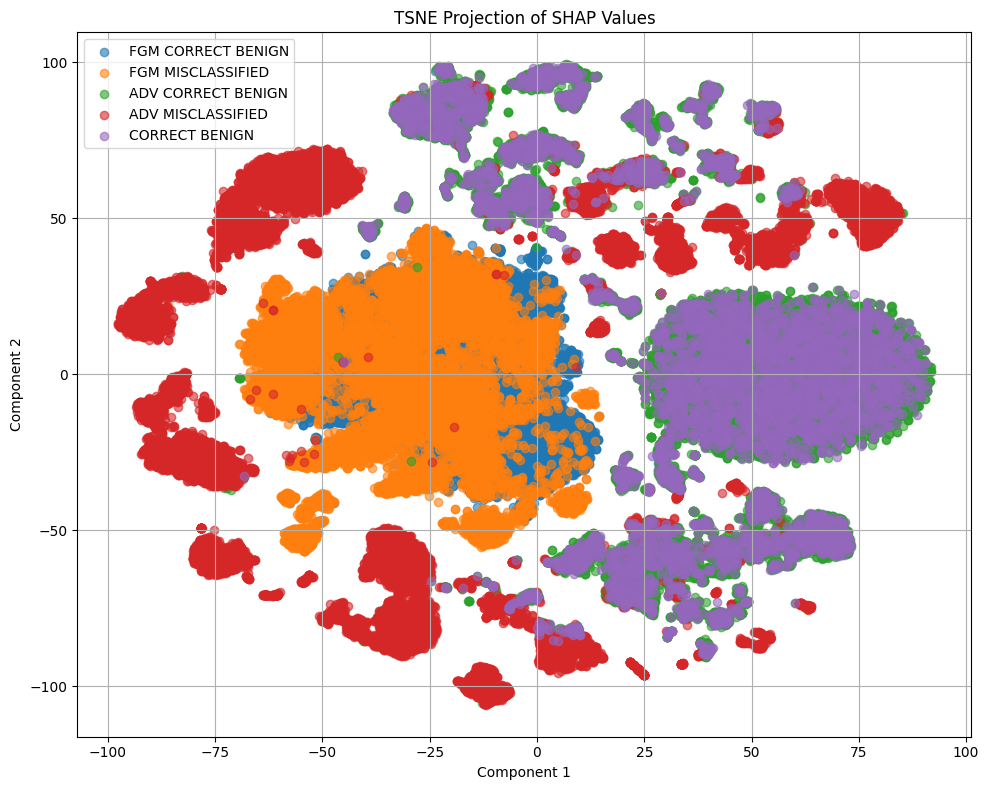

In [15]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Optional: UMAP (must be installed separately)
try:
    import umap
    UMAP_AVAILABLE = True
except ImportError:
    UMAP_AVAILABLE = False

def plot_dim_reduction(X, y_onehot, class_labels, method="pca", **kwargs):
    """
    Plots dimensionality-reduced data using PCA, t-SNE, or UMAP.

    Args:
        X (ndarray or DataFrame): Feature matrix.
        y_onehot (ndarray): One-hot encoded labels.
        class_labels (list of str): Class label names.
        method (str): 'pca', 'tsne', or 'umap'.
        **kwargs: Additional arguments for the reducer (e.g., perplexity for t-SNE).
    """
    y_indices = np.argmax(y_onehot, axis=1)

    if method == "pca":
        reducer = PCA(n_components=2)
    elif method == "tsne":
        reducer = TSNE(n_components=2, random_state=42, **kwargs)
    elif method == "umap":
        if not UMAP_AVAILABLE:
            raise ImportError("UMAP is not installed. Run: pip install umap-learn")
        reducer = umap.UMAP(n_components=2, random_state=42, **kwargs)
    else:
        raise ValueError("Invalid method. Choose from 'pca', 'tsne', or 'umap'.")

    X_reduced = reducer.fit_transform(X)

    # Plot
    plt.figure(figsize=(10, 8))
    for i, label in enumerate(class_labels):
        idx = y_indices == i
        plt.scatter(X_reduced[idx, 0], X_reduced[idx, 1], label=label, alpha=0.6)

    plt.title(f"{method.upper()} Projection of SHAP Values")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Choose method: 'pca', 'tsne', or 'umap'
plot_dim_reduction(X, y, class_samples, method="tsne", perplexity=30)
# plot_dim_reduction(X, y, class_samples, method="pca")

---
## Manual Evaluation
We perform the whole two-stages approach on new unseen data and evaluate the following scores:
- Recall
- Precision
- Accuracy
- F1 Score

In [7]:
import functions.data_preprocessing as dp
import importlib
importlib.reload(dp)

# exclude previously used samples
dataset_eval_excluded = dataset.drop(index=used_indices)

X_eval, y_eval, used_eval_indices = dp.preprocess_data(dataset_eval_excluded, encoding_type, normalizer, zero_columns, sample_size=1000, random_sample_state=17)
print(f"Generate Features | Indices: {X_eval.index[:5]}... | Shape: {X_eval.shape}")
print(f"Generate Labels | Indices: {y_eval.index[:5]}... | Shape: {y_eval.shape}")
print(y_eval.value_counts())

-- Preprocessing data --
--- Splitting labels and features ---
--- Encoding labels as binary one-hot values ---
--- Sampling balanced data ---
Sample to shape: (2000, 70)
--- Normalizing features using MinMaxScaler ---
Generate Features | Indices: Index([1237277, 1117276, 1077149, 213477, 144738], dtype='int64')... | Shape: (2000, 70)
Generate Labels | Indices: Index([1237277, 1117276, 1077149, 213477, 144738], dtype='int64')... | Shape: (2000, 2)
BENIGN  ATTACK
False   True      1000
True    False     1000
Name: count, dtype: int64


### Load Detector etc.

In [31]:
# import functions.detector as det
# import functions.explainer as exp
# import functions.attack_generator as ag
# importlib.reload(det)
# import numpy as np
# detector = det.load('omikron')

# print(detector.summary())

# explainer = exp.generate_shap_explainer(ids_model, X_train)

# all_features = dataset.drop(columns=[' Label'])
# art_model = ag.convert_to_art_model(ids_model, X_train) # TODO: use all features for generating art model

# import multiprocessing
# num_cores = multiprocessing.cpu_count()

In [10]:
importlib.reload(ag)

X_adv_eval = ag.generate_boundary_attacks_parallel(art_model, X_eval, target_label=1, num_cores=num_cores)
print(f"Create Adversarial Attack | Indices: {X_adv_eval.index[:5]}... | Shape: {X_adv_eval.shape}")

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_adv_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

Running attack using 24 CPU cores...

Process 57365 is generating adversarial examples for batch of size 83 
Process 57366 is generating adversarial examples for batch of size 83 
Process 57367 is generating adversarial examples for batch of size 83 
Process 57368 is generating adversarial examples for batch of size 83 
Process 57369 is generating adversarial examples for batch of size 83 
Process 57371 is generating adversarial examples for batch of size 83 
Process 57370 is generating adversarial examples for batch of size 83 
Process 57372 is generating adversarial examples for batch of size 83 
Process 57373 is generating adversarial examples for batch of size 83 
Process 57374 is generating adversarial examples for batch of size 83 


Process 57375 is generating adversarial examples for batch of size 83 

Process 57379 is generating adversarial examples for batch of size 83 
Process 57377 is generating adversarial examples for batch of size 83 
Process 57376 is generating adversar

In [13]:
importlib.reload(exp)
X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_adv_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

PermutationExplainer explainer: 2001it [00:57, 29.35it/s]                          


Create Explanations | Indices: Index([1237277, 1117276, 1077149, 213477, 144738], dtype='int64')... | Shape: (2000, 70)


In [86]:
# # normal shap values
# y_pred_adv_eval = ag.evaluate_art_model(art_model, X_eval, y_eval)
# print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

# X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_eval)

# print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

In [22]:
benign_eval_idx = y_eval[y_eval['BENIGN'] == 1].index
attack_eval_idx = y_eval[y_eval['ATTACK'] == 1].index

pred_benign_idx = y_pred_adv_eval[y_pred_adv_eval['BENIGN'] == 1].index
pred_attack_idx = y_pred_adv_eval[y_pred_adv_eval['ATTACK'] == 1].index

# predict
# columns = y_train_det.columns
columns = ['ADV CORRECT BENIGN', 'ADV MISCLASSIFIED', 'CORRECT BENIGN', 'DA']
X_eval_detector = X_eval_adv_shap_values_df.loc[pred_benign_idx]
y_pred_eval_detector = det.predict(detector, X_eval_detector, columns)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step


2025-04-28 15:31:38.518769: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}


In [23]:
pred_class_0 = y_pred_eval_detector[y_pred_eval_detector['ADV CORRECT BENIGN'] == 1].index 
pred_class_1 = y_pred_eval_detector[y_pred_eval_detector['ADV MISCLASSIFIED'] == 1].index
pred_class_4 = y_pred_eval_detector[y_pred_eval_detector['CORRECT BENIGN'] == 1].index

print(f"Predicted Class 0: {len(pred_class_0)}")
print(f"Predicted Class 1: {len(pred_class_1)}")
print(f"Predicted Class 4: {len(pred_class_4)}")

Predicted Class 0: 0
Predicted Class 1: 1020
Predicted Class 4: 965


In [24]:
# After IDS Stage
TN = len(attack_eval_idx.intersection(pred_attack_idx)) # IDS classifies 'ATTACK' samples as 'ATTACK'
print(f"IDS classifies 'ATTACK' samples as 'ATTACK': {TN}")
FN = len(benign_eval_idx.intersection(pred_attack_idx)) # IDS classifies 'BENIGN' samples as 'ATTACK'
print(f"IDS mis-classifies 'BENIGN' samples as 'ATTACK': {FN}")

# TODO: define correct and misclassified classes for each attack:
correctly_classified_det_idx = y_pred_eval_detector.loc[pred_class_4].index # Detector classifies 'BENIGN' samples as correct 'BENIGN'
misclassified_det_idx = y_pred_eval_detector.loc[pred_class_1].index # Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'

# After Detector Stage
TP = len(benign_eval_idx.intersection(correctly_classified_det_idx)) # Detector classifies 'BENIGN' samples as correct 'BENIGN'
print(f"Detector classifies 'BENIGN' samples as correct 'BENIGN': {TP}")
FP = len(attack_eval_idx.intersection(correctly_classified_det_idx)) # Detector classifies 'ATTACK' samples as correct 'BENIGN'
print(f"Detector mis-classifies 'ATTACK' samples as correct 'BENIGN': {FP}")

TN_2 = len(attack_eval_idx.intersection(misclassified_det_idx)) # Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK'
print(f"Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK': {TN_2}")
FN_2 = len(benign_eval_idx.intersection(misclassified_det_idx)) # Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK'
print(f"Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK': {FN_2}")

# Sum up TN & FN from both stages
TN = TN + TN_2
FN = FN + FN_2

print(f"TP: {TP}")
print(f"FP: {FP}")
print(f"TN: {TN}")
print(f"FN: {FN}")
print(f"Sum: {TP + FP + TN + FN}")

IDS classifies 'ATTACK' samples as 'ATTACK': 11
IDS mis-classifies 'BENIGN' samples as 'ATTACK': 1
Detector classifies 'BENIGN' samples as correct 'BENIGN': 958
Detector mis-classifies 'ATTACK' samples as correct 'BENIGN': 7
Detector classifies 'ATTACK' samples as misclassified due to 'ATTACK': 979
Detector classifies 'BENIGN' samples as misclassified due to 'ATTACK': 41
TP: 958
FP: 7
TN: 990
FN: 42
Sum: 1997


In [25]:
from sklearn.metrics import classification_report

print(f"Global Accuracy: {(TP + TN) / (TP + FP + TN + FN) * 100:.2f}%")

# Construct a fake y_true and y_pred to match sklearn's classification_report format
y_true = np.array([1] * TP + [0] * TN + [1] * FN + [0] * FP)  # True labels
y_pred = np.array([1] * TP + [0] * TN + [0] * FN + [1] * FP)  # Predicted labels

# Generate classification report
report = classification_report(y_true, y_pred, target_names=['ATTACK', 'BENIGN'], digits=4) # reverse labels because classification_report assumes first label is 0
print(report)

print(f"True Negative Rate: {TN/(TN+FP)*100:.2f}%")
print(f"False Positive Rate: {FP/(TN+FP)*100:.2f}%")
print(f"True Positive Rate: {TP/(TP+FN)*100:.2f}%")
print(f"False Negative Rate: {FN/(TP+FN)*100:.2f}%")

Global Accuracy: 97.55%
              precision    recall  f1-score   support

      ATTACK     0.9593    0.9930    0.9759       997
      BENIGN     0.9927    0.9580    0.9751      1000

    accuracy                         0.9755      1997
   macro avg     0.9760    0.9755    0.9755      1997
weighted avg     0.9760    0.9755    0.9755      1997

True Negative Rate: 99.30%
False Positive Rate: 0.70%
True Positive Rate: 95.80%
False Negative Rate: 4.20%


In [26]:
sample_indices = y_pred_eval_detector.index
print(f"#Attack-Samples: {len(sample_indices)}")

detected_indices = np.unique(np.concatenate((pred_class_4, pred_class_1)))
print(f"Predicted indices: {len(detected_indices)}")

correct_benign_pred_indices = np.intersect1d(sample_indices, detected_indices)
print(f"Predicted Normal indices: {len(correct_benign_pred_indices)}")

normal_benign_misclassified_indices = np.setdiff1d(sample_indices, detected_indices)
print(f"Normal Misclassified indices: {len(normal_benign_misclassified_indices)}")

print(f"ADV Detection Rate: {len(correct_benign_pred_indices) / len(sample_indices):.4f}")
print(f"Misclassification Rate: {len(normal_benign_misclassified_indices) / len(sample_indices):.4f}")

#Attack-Samples: 1985
Predicted indices: 1985
Predicted Normal indices: 1985
Normal Misclassified indices: 0
ADV Detection Rate: 1.0000
Misclassification Rate: 0.0000


### Attack Success Rate (ASR)

In [27]:
# Attack = Misclassified as benign
attacks_idx = attack_eval_idx.intersection(pred_benign_idx)
print(f"Misclassified as BENIGN - Attacks: {len(attacks_idx)}")


# Accepted Samples
accepted_benign_det_idx = y_pred_eval_detector.loc[pred_class_4].index # Detector classifies 'BENIGN' samples as correct 'BENIGN'
print(f"Accepted Samples: {len(accepted_benign_det_idx)}")

# Attack Success
correct_benign_det = attacks_idx.intersection(accepted_benign_det_idx)
print(f"Successful Attacks: {len(correct_benign_det)}")

# Attack Success Rate
attack_success_rate = len(correct_benign_det) / len(attacks_idx) # / #working attacks
print(f"Attack Success Rate: {attack_success_rate:.4f}")
true_positive_rate = len(correct_benign_det) / len(attack_eval_idx) # / #all attacked samples
print(f"Attack Success Rate (all attacked samples): {true_positive_rate:.4f}")

Misclassified as BENIGN - Attacks: 986
Accepted Samples: 965
Successful Attacks: 7
Attack Success Rate: 0.0071
Attack Success Rate (all attacked samples): 0.0070


### BENIGN False Negative Rate

In [28]:
# normal shap values

y_pred_adv_eval = ag.evaluate_art_model(art_model, X_eval, y_eval)
print(f"Predictions on Adversarial Attacks | Indices: {y_pred_adv_eval.index[:5]}... | Shape: {y_pred_adv_eval.shape}")

X_eval_adv_shap_values_df = exp.generate_shap_values(explainer, X_eval)

print(f"Create Explanations | Indices: {X_eval_adv_shap_values_df.index[:5]}... | Shape: {X_eval_adv_shap_values_df.shape}")

Accuracy: 98.50%
              precision    recall  f1-score   support

      ATTACK     0.9764    0.9940    0.9851      1000
      BENIGN     0.9939    0.9760    0.9849      1000

    accuracy                         0.9850      2000
   macro avg     0.9852    0.9850    0.9850      2000
weighted avg     0.9852    0.9850    0.9850      2000

Confusion Matrix: Positive == BENIGN
TN: 994, FP: 6, FN: 24, TP: 976
Predictions on Adversarial Attacks | Indices: Index([1237277, 1117276, 1077149, 213477, 144738], dtype='int64')... | Shape: (2000, 2)


PermutationExplainer explainer: 2001it [00:51, 31.72it/s]                          

Create Explanations | Indices: Index([1237277, 1117276, 1077149, 213477, 144738], dtype='int64')... | Shape: (2000, 70)


In [30]:
# predict
X_eval_detector = X_eval_adv_shap_values_df.loc[pred_benign_idx]
y_pred_eval_detector = det.predict(detector, X_eval_detector, columns)

pred_class_0 = y_pred_eval_detector[y_pred_eval_detector['ADV CORRECT BENIGN'] == 1].index 
pred_class_1 = y_pred_eval_detector[y_pred_eval_detector['ADV MISCLASSIFIED'] == 1].index
pred_class_4 = y_pred_eval_detector[y_pred_eval_detector['CORRECT BENIGN'] == 1].index
print(f"Predicted Class 0: {len(pred_class_0)}")
print(f"Predicted Class 1: {len(pred_class_1)}")
print(f"Predicted Class 4: {len(pred_class_4)}")


# Accepted Samples
accepted_benign_det_idx = y_pred_eval_detector.loc[pred_class_4].index # Detector classifies 'BENIGN' samples as correct 'BENIGN'
print(f"Accepted Samples: {len(accepted_benign_det_idx)}")

# Correct BENIGN predicted Samples
correct_benign_det = benign_eval_idx.intersection(accepted_benign_det_idx)
print(f"Correct BENIGN Predicted: {len(correct_benign_det)}")

# True Positive Rate
true_positive_rate = len(correct_benign_det) / len(benign_eval_idx) # / #all BENIGN samples
print(f"Attack Success Rate (all attacked samples): {true_positive_rate:.4f}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 669us/step
Predicted Class 0: 1
Predicted Class 1: 1022
Predicted Class 4: 962
Accepted Samples: 962
Correct BENIGN Predicted: 956
Attack Success Rate (all attacked samples): 0.9560


2025-04-28 15:34:08.293287: E tensorflow/core/framework/node_def_util.cc:676] NodeDef mentions attribute use_unbounded_threadpool which is not in the op definition: Op<name=MapDataset; signature=input_dataset:variant, other_arguments: -> handle:variant; attr=f:func; attr=Targuments:list(type),min=0; attr=output_types:list(type),min=1; attr=output_shapes:list(shape),min=1; attr=use_inter_op_parallelism:bool,default=true; attr=preserve_cardinality:bool,default=false; attr=force_synchronous:bool,default=false; attr=metadata:string,default=""> This may be expected if your graph generating binary is newer  than this binary. Unknown attributes will be ignored. NodeDef: {{node ParallelMapDatasetV2/_14}}
